# Logistic Regression (MNIST)

## library

In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.datasets import mnist

## load data

In [4]:
# load data
data = mnist.load_data()
# data
print('type(data): ', type(data))
print('len(data): ', len(data))

11493376/11490434 [==============================] - 1s 0us/step
type(data):  <class 'tuple'>
len(data):  2


## X, y split

In [6]:
train_data, test_data = data

In [8]:
# train data X, y split
x_train, y_train = train_data
print('x_train.shape, y_train.shape')
print(x_train.shape, y_train.shape)

# train data X, y split
x_test, y_test = test_data
print('x_test.shape, y_test.shape')
print(x_test.shape, y_test.shape)


x_train.shape, y_train.shape
(60000, 28, 28) (60000,)
x_test.shape, y_test.shape
(10000, 28, 28) (10000,)


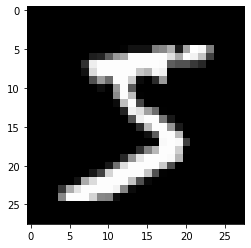

y_train:  [5 0 4 ... 5 6 8]
x_train:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

In [9]:
plt.figure()
plt.imshow(x_train[0], 'gray')
plt.show()
print('y_train: ', y_train)
print('x_train: ', x_train[0])

## data shape

In [10]:
# data shape
shape = x_train.shape[1:]
print("shape: ", shape)

shape:  (28, 28)


## data reshape, normalize

In [12]:
# data normalize

reshaped_x_train = x_train.reshape(-1, 784)
reshaped_x_test = x_test.reshape(-1, np.prod(shape))

X_train = reshaped_x_train / 255
X_test = reshaped_x_test / 255

## sparse label to one-hot label

In [15]:
print('10x10 identity matrix \n', np.eye(10))
sparse_label = np.array([1,3,5,7,9])
print('sparse lable: ', sparse_label)
print('sparse label to one hot lable \n', np.eye(10)[sparse_label])

10x10 identity matrix 
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
sparse lable:  [1 3 5 7 9]
sparse label to one hot lable 
 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [20]:
Y_train = np.eye(10)[y_train]
Y_test = np.eye(10)[y_test]

In [26]:
Y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## data load, preprocess sum-up

In [16]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# original image data (28, 28 per sample, unnormalized)
# original image data (sparse encoding)


print("image shape: ", x_train.shape, x_test.shape)
print('label shape: ', y_train.shape, y_test.shape)

image shape:  (60000, 28, 28) (10000, 28, 28)
label shape:  (60000,) (10000,)


## hypter paremeter setting

In [27]:
# hyper parameter setting
learning_rate = .1
training_epochs = 100
display_step = 5

In [19]:
tf_X = tf.placeholder(tf.float32, [None, 784])
tf_Y = tf.placeholder(tf.float32, [None, 10])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# variable shape direct setting

pred = tf.nn.softmax(tf.matmul(tf_X, W) + b)

# soft max > sum of all dimension = 1
# each dimension, in this case, has 10 

# cross entropy loss
loss = tf.reduce_mean(-tf.reduce_sum(
    tf_Y * tf.log(pred)
    , axis = 1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [30]:
# trian

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for epoch in range(0, training_epochs):
    sess.run(optimizer, feed_dict = {tf_X: X_train, tf_Y : Y_train})
    
print("Optimization Completed")

correct_predict = tf.equal(tf.argmax(pred, 1), tf.argmax(tf_Y, 1))
# 실제 정답 (tf_Y << 원핫인코딩한거) 예측 정답 (pred <M 소프트맥스로 나온 벡터의 제일 큰 값의 인덱스) 를 비교..
accuracy = tf.reduce_mean(tf.cast(correct_predict, tf.float32))
accuracy_eval = sess.run(accuracy, feed_dict = {tf_X: X_test, tf_Y: Y_test})
print("Accuracy: ", accuracy_eval)

Optimization Completed
Accuracy:  0.8707


## confusion matrix

In [31]:
# confusion matrix
from sklearn.metrics import confusion_matrix

y_test_pred = sess.run(pred, feed_dict={tf_X:X_test, tf_Y: Y_test})
confusion_matrix(
    y_test,
    np.argmax(y_test_pred, 1)) # y_pred

array([[ 946,    0,    3,    3,    0,    4,   15,    1,    8,    0],
       [   0, 1089,    5,    3,    1,    4,    4,    0,   29,    0],
       [  16,   19,  845,   26,   20,    0,   28,   22,   49,    7],
       [   5,    2,   22,  880,    1,   32,    8,   20,   26,   14],
       [   3,    8,    5,    0,  865,    1,   17,    2,   10,   71],
       [  24,   15,    7,   74,   25,  650,   27,   11,   42,   17],
       [  20,    5,   13,    2,   13,   20,  879,    0,    6,    0],
       [   4,   38,   25,    1,   13,    0,    4,  889,   10,   44],
       [  10,   16,   13,   40,   12,   22,   18,   14,  809,   20],
       [  14,   13,   11,   12,   53,   11,    1,   28,   11,  855]])

In [36]:
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
losses = [] ## add losses

for epoch in range(0, training_epochs):
    _, l = sess.run([optimizer, loss], feed_dict = {tf_X: X_train, tf_Y: Y_train})
    
    losses += [l]
    
    if (epoch + 1) % display_step == 0:
        print("Epoch: ", epoch +1, "\tLoss: ", l)
        
print("Optimization Completed")

correct_preidction = tf.equal(tf.argmax(pred, 1), tf.argmax(tf_Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_preidction, tf.float32))
accuracy_eval = sess.run(accuracy, feed_dict = {tf_X : X_test, tf_Y : Y_test})
print("Accuracy: ", accuracy_eval)

Epoch:  5 	Loss:  1.9290577
Epoch:  10 	Loss:  1.5986427
Epoch:  15 	Loss:  1.3717638
Epoch:  20 	Loss:  1.2122678
Epoch:  25 	Loss:  1.0960866
Epoch:  30 	Loss:  1.0083592
Epoch:  35 	Loss:  0.9399643
Epoch:  40 	Loss:  0.8851721
Epoch:  45 	Loss:  0.8402643
Epoch:  50 	Loss:  0.8027469
Epoch:  55 	Loss:  0.7708938
Epoch:  60 	Loss:  0.74347645
Epoch:  65 	Loss:  0.7195984
Epoch:  70 	Loss:  0.6985906
Epoch:  75 	Loss:  0.6799438
Epoch:  80 	Loss:  0.663264
Epoch:  85 	Loss:  0.64824116
Epoch:  90 	Loss:  0.6346279
Epoch:  95 	Loss:  0.62222415
Epoch:  100 	Loss:  0.61086744
Optimization Completed
Accuracy:  0.8707


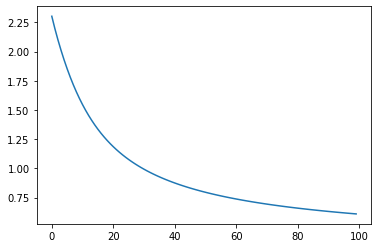

In [37]:
plt.figure()
plt.plot(losses)
plt.show()

## model

In [39]:
#build model and optimizer

tf_X = tf.placeholder(tf.float32, [None, 784])
tf_Y = tf.placeholder(tf.float32, [None, 10])

logit = tf.layers.dense(tf_X, 10)
pred = tf.nn.softmax(logit)

# cross entropy loss

loss = tf.losses.softmax_cross_entropy(tf_Y, logit)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [40]:
# train

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for epoch in range(0, training_epochs):
    sess.run(optimizer, feed_dict = {tf_X: X_train, tf_Y: Y_train})
    
print("Optimization completed")

correct_preidction = tf.equal(tf.argmax(pred, 1), tf.argmax(tf_Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_preidction, tf.float32))
accuracy_eval = sess.run(accuracy, feed_dict = {tf_X : X_test, tf_Y : Y_test})
print("Accuracy: ", accuracy_eval)

Optimization completed
Accuracy:  0.8664


In [41]:
# confusion matrix

y_test_pred = sess.run(pred, feed_dict={tf_X:X_test, tf_Y: Y_test})
confusion_matrix(
    y_test,
    np.argmax(y_test_pred, 1)) # y_pred

array([[ 942,    0,    3,    7,    0,    4,   16,    1,    7,    0],
       [   0, 1100,    3,    2,    1,    2,    4,    0,   23,    0],
       [  17,   19,  840,   22,   21,    0,   28,   23,   53,    9],
       [   8,    3,   27,  862,    1,   42,    8,   20,   22,   17],
       [   3,    8,    3,    2,  854,    1,   18,    2,   10,   81],
       [  25,   17,    3,   69,   16,  644,   28,   13,   59,   18],
       [  17,    3,   15,    3,   21,   16,  875,    1,    7,    0],
       [   3,   39,   27,    3,   12,    0,    1,  892,    7,   44],
       [   8,   14,   13,   43,   11,   27,   17,   15,  802,   24],
       [  14,   13,    9,   14,   44,   10,    3,   37,   12,  853]])

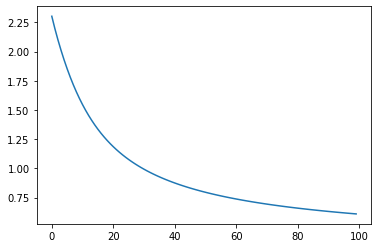

In [42]:
plt.figure()
plt.plot(losses)
plt.show()